In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import minimize_scalar

In [2]:
G = 9.80665

Missile start point: (-0.14142135623730953; 0.05857864376269048)
Weight start point: (0.03535533905932738; 0.2353553390593274)
Launching missile with angle: 45.00 degrees and v0: 3.26 m/s
Vx: 2.3072821751909416, Vy: 2.3072821751909416
Flight time: 0.4947038418232699 s, x_move: 1.1414213562373097 m, y_move: 0.0 m


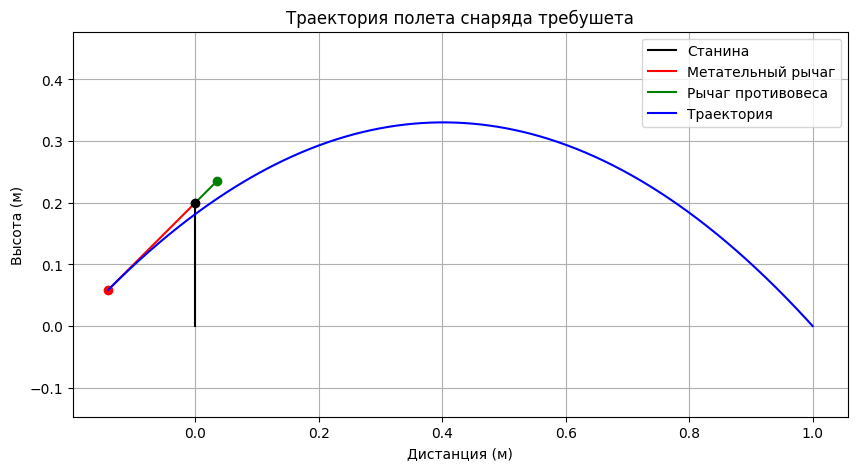

In [3]:
class Trebuchet:
    def __init__(self, arm_ratio, frame_height, arm_length, start_angle, release_angle, missile_mass, arm_mass):
        self.frame_height = frame_height    # Высота вала
        
        self.arm_ratio = arm_ratio          # Доля рычага, относящаяся к весу
        self.arm_length = arm_length        # Длина рычага
        self.missile_arm_length = arm_length * (1 - arm_ratio)
        self.weight_arm_length = arm_length * arm_ratio
        
    def calculate_launch_velocity(self, distance, rad_angle):
        self.missile_x = -np.cos(rad_angle) * self.missile_arm_length
        self.missile_y = -np.sin(rad_angle) * self.missile_arm_length + self.frame_height

        self.weight_x = np.cos(rad_angle) * self.weight_arm_length
        self.weight_y = np.sin(rad_angle) * self.weight_arm_length + self.frame_height

        print(f"Missile start point: ({self.missile_x}; {self.missile_y})")
        print(f"Weight start point: ({self.weight_x}; {self.weight_y})")

        x_move = -self.missile_x + distance
        numerator = G * (x_move ** 2)
        denomenator = 2 * (np.cos(rad_angle) ** 2) * (self.missile_y + x_move * np.tan(rad_angle))
        v0 = math.sqrt(numerator / denomenator)
        
        

        print(f"Launching missile with angle: {np.degrees(rad_angle):.2f} degrees and v0: {v0:.2f} m/s")
        return v0
    
    def calculate_weight_mass(self):
        """
        Вычисление массы противовеса для требушета.

        :param m_m: масса снаряда (кг)
        :param v0: начальная скорость снаряда (м/с)
        :param l_m: длина плеча снаряда (м)
        :param l_w: длина плеча противовеса (м)
        :param h: высота крепления оси вращения (м)
        :param theta: угол запуска (в радианах)
        :param g: ускорение свободного падения (по умолчанию 9.80665 м/с^2)
        :return: масса противовеса (кг)
        """
        numerator = self.missile_mass * self.v0**2
        denominator = 2 * G * (self.weight_mass * math.sin(theta) + h) - (l_m**2 / l_w**2) * v0**2
        
        # Проверка на допустимость значений (масса противовеса должна быть положительной)
        if denominator <= 0:
            raise ValueError("Заданные параметры невозможны для достижения требуемой скорости вылета.")
        
        m_w = numerator / denominator
        return m_w

    def trajectory(self, v0, angle):
        v_y = v0 * np.sin(angle)
        v_x = v0 * np.cos(angle)
        print(f"Vx: {v_x}, Vy: {v_y}")

        first_path_time = v_y / G                      # Время до достижения наивысшей точки
        max_y = self.missile_y + v_y * first_path_time - 0.5 * G * (first_path_time ** 2)

        second_path_time = math.sqrt((2 * max_y) / G)    # Время от высшей точки до падения
        total_time = first_path_time + second_path_time     # Общее время полета

        print(f"Flight time: {total_time} s, x_move: {v_x * total_time} m, y_move: {self.missile_y + v_y * total_time - 0.5 * G * (total_time)**2} m")

        t = np.linspace(0, total_time, num=1000)            # Временные точки
        x = self.missile_x + v_x * t                        # Положение по x
        y = self.missile_y + v_y * t - 0.5 * G * t**2  # Положение по y

        return t, x, y

    def visualize(self, distance, start_angle=None, end_angle=45):
        rad_angle = np.radians(end_angle % 90)
        v0 = self.calculate_launch_velocity(distance, rad_angle)
        
        t, x, y = self.trajectory(v0, rad_angle)

        plt.figure(figsize=(10, 5))
        plt.plot([0, 0], [0, self.frame_height], label='Станина', color="black")
        plt.plot([self.missile_x, 0], [self.missile_y, self.frame_height], label='Метательный рычаг', color='red')
        plt.plot([0, self.weight_x], [self.frame_height, self.weight_y], label='Рычаг противовеса', color='green')

        plt.plot(self.missile_x, self.missile_y, marker='o', color='red')
        plt.plot(0, self.frame_height, marker='o', color='black')
        plt.plot(self.weight_x, self.weight_y, marker='o', color='green')

        plt.plot(x, y, label='Траектория', color='blue')
        plt.xlabel('Дистанция (м)')
        plt.ylabel('Высота (м)')
        plt.title('Траектория полета снаряда требушета')

        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        # plt.xticks(np.arange(0, plt.xlim()[1], 0.1))
        plt.show()
        

trebuchet = Trebuchet(0.2, 0.2, 0.25, 215, 15, 0.1, 0.2)
trebuchet.visualize(1, 20)